In [1]:
#this is the first one of the Unsupervised Machine learning algorithm where we are dearling with 
#K-Means clustering the date is 28, July, 2025


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/salary/Salary_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


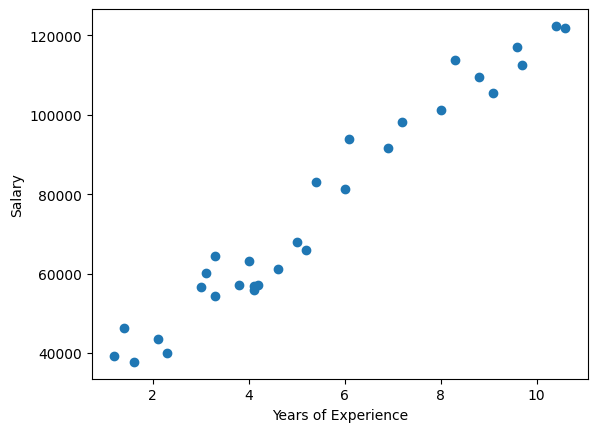

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
y_pred=km.fit(df[['YearsExperience','Salary']])
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [7]:
df['Cluster']=y_pred.labels_
df.head(100)

,Unnamed: 0,YearsExperience,Salary,Cluster
0,0,1.2,39344.0,1
1,1,1.4,46206.0,1
2,2,1.6,37732.0,1
3,3,2.1,43526.0,1
4,4,2.3,39892.0,1
5,5,3.0,56643.0,1
6,6,3.1,60151.0,1
7,7,3.3,54446.0,1
8,8,3.3,64446.0,1
9,9,3.8,57190.0,1


In [8]:
#where the centers of the cluster exists it gives us those center points
km.cluster_centers_
#we can also plot the centers of the centers


array([[6.60000000e+00, 9.16183333e+04],
       [3.31176471e+00, 5.45712353e+04],
       [9.50000000e+00, 1.14671286e+05]])

In [9]:
df1=df[df['Cluster']==0]
df2=df[df['Cluster']==1]
df3=df[df['Cluster']==2]


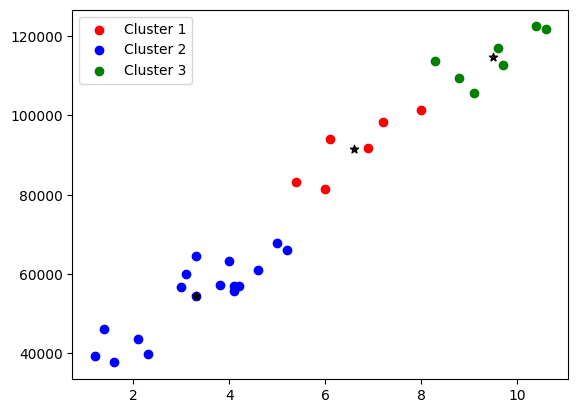

In [10]:
plt.scatter(df1['YearsExperience'],df1['Salary'], color='red', label='Cluster 1')
plt.scatter(df2['YearsExperience'],df2['Salary'], color='blue', label='Cluster 2')
plt.scatter(df3['YearsExperience'],df3['Salary'], color='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow method for K')

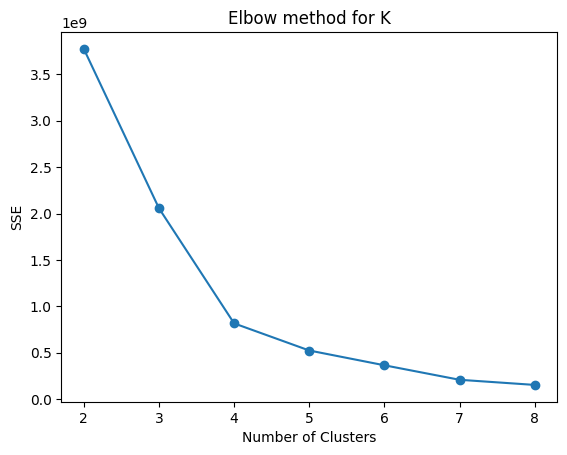

In [11]:
#so i dont think so we can perdict the perfect clusters like how we know that whethere the optimal clusters 
#are 2, 3 or 4 so for that what we will do is we will use the elbo method so these are the steps to make it happ3en

#Step 1: first we will have an empty sse list
sse=[]
#Step 2: we will have a range which will start from two and end on the 20
k_range= range(2,9)
#Step 3: the k will get the number from the k_range to give that one by one to model after that those k clusters 
#will be saved to that sse list to see that optimal k that will bend the graph completely on the plt section
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['YearsExperience','Salary']])
    sse.append(km.inertia_)

plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(k_range, sse, marker='o')
plt.title('Elbow method for K')